In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.interpolate import interp1d
from starkiller import starkiller
from scipy.ndimage import gaussian_filter
import pandas as pd
from astropy.io import ascii
from astropy.table import Table

%matplotlib notebook

Number of sources brighter than 25: 1
Coords transformed
Calculating PSF coord shift
PSF shift:  [-0.01204256 -0.01407969  0.02581934]


<IPython.core.display.Javascript object>


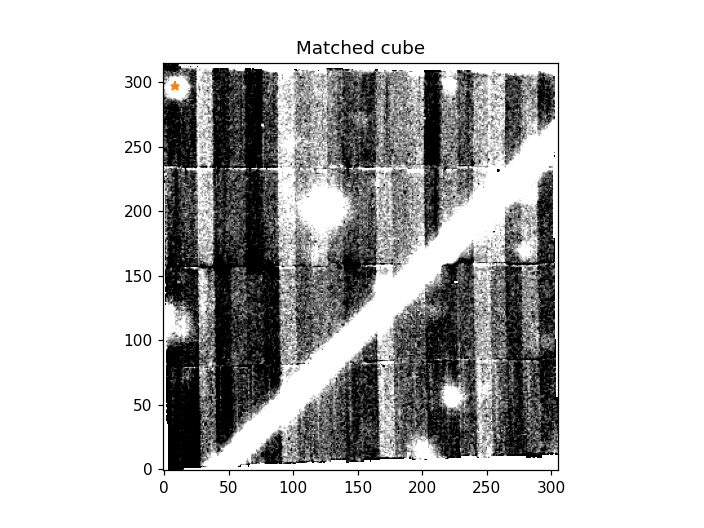

!!! Large difference of 0.47 between model_psf and data_psf!!!
Using the data_psf, override by setting psf_preference='model'
Made PSF
Using the data PSF
Background subtracted
Extracted spectra


<IPython.core.display.Javascript object>


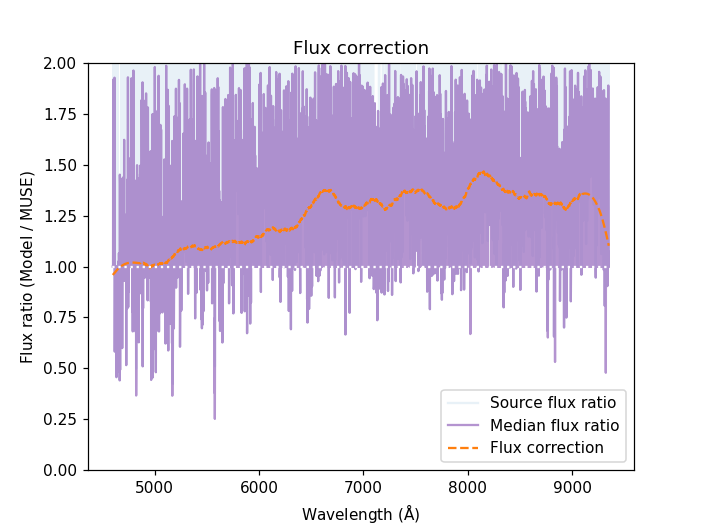

<IPython.core.display.Javascript object>


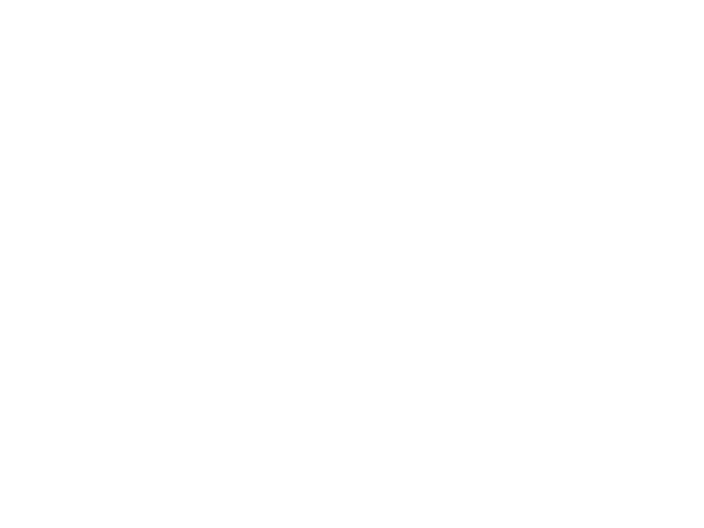

Using the data PSF
Made scene


<IPython.core.display.Javascript object>


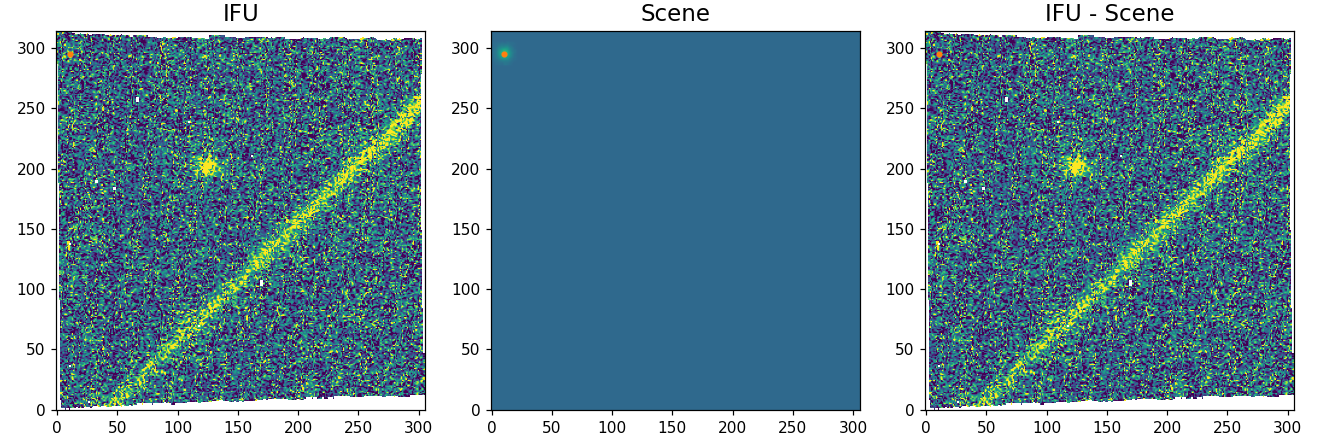

Saved reduction


In [2]:
# Just need to get a wavelength range
muse = starkiller(file='sat/ADP.2022-07-14T15:54:47.933.fits',run=True,numcores=7,spec_catalog='ck',
                  psf_profile='gaussian',wcs_correction=False,cal_maglim=25,
                  savepath='filename',force_flux_correction=True,satellite=False)

In [77]:
0.26 / 0.125 * 10

20.8

In [3]:
import pysynphot as S

In [7]:
# High res CK models

files = glob('../starkiller/data/starkiller_subset/*.gz')

blur = 0.26 / 0.125 * 10

lam = np.loadtxt('../starkiller/data/starkiller_subset/LAMBDA_R20.DAT')
nlam = np.arange(muse.lam[0],muse.lam[-1],np.diff(muse.lam)[0]/10)
for file in files:
    flux = np.loadtxt(file)
    interp = interp1d(lam,flux)
    finterp = interp(nlam)
    thingo = gaussian_filter(finterp,blur)
    s = S.ArraySpectrum(wave=nlam,flux=thingo)
    final = {'wave':muse.lam,'flux':s.sample(muse.lam)}
    final = Table(final)
    fname = '../starkiller/data/munari05/' + file.split('/')[-1].split('.ASC')[0] + '.dat.gz'
    ascii.write(final,fname,overwrite=True)

In [99]:
files = glob('../starkiller/data/common_stars_raw/*.gz')

blur = 0.26 / 0.125 * 10

lam = np.loadtxt('../starkiller/data/flx_wavelengths.vac.gz')
nlam = np.arange(muse.lam[0],muse.lam[-1],np.diff(muse.lam)[0]/10)
for file in files:
    flux = np.loadtxt(file)
    interp = interp1d(lam,flux)
    finterp = interp(nlam)
    thingo = gaussian_filter(finterp,blur)
    s = S.ArraySpectrum(wave=nlam,flux=thingo)
    final = {'wave':muse.lam,'flux':s.sample(muse.lam)}
    final = Table(final)
    fname = '../starkiller/data/marcs-t02/' + file.split('/')[-1].split('.flx')[0] + '.dat.gz'
    ascii.write(final,fname,overwrite=True)

In [102]:
files = glob('../starkiller/data/griddl-ob-i-line_raw/*')
nlam = np.arange(muse.lam[0],muse.lam[-1],np.diff(muse.lam)[0]/10)

for file in files:
    spec = ascii.read(file)
    interp = interp1d(spec['wave'],spec['flux'])
    finterp = interp(nlam)
    thingo = gaussian_filter(finterp,blur)
    s = S.ArraySpectrum(wave=nlam,flux=thingo)
    final = {'wave':muse.lam,'flux':s.sample(muse.lam)}
    final = Table(final)
    fname = '../starkiller/data/griddl-ob-i-line/' + file.split('/')[-1].split('.flx')[0] + '.dat.gz'
    ascii.write(final,fname,overwrite=True)

In [84]:
test = ascii.read(files[0])

<IPython.core.display.Javascript object>


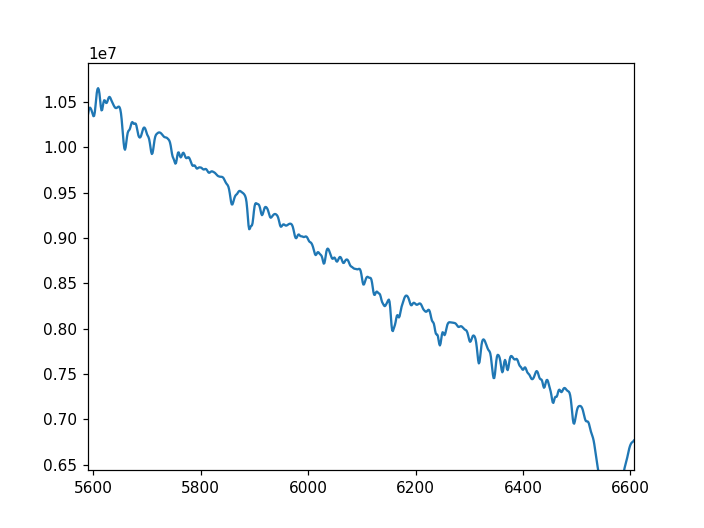

In [8]:
plt.figure()
plt.plot(final['wave'],final['flux'])

<IPython.core.display.Javascript object>


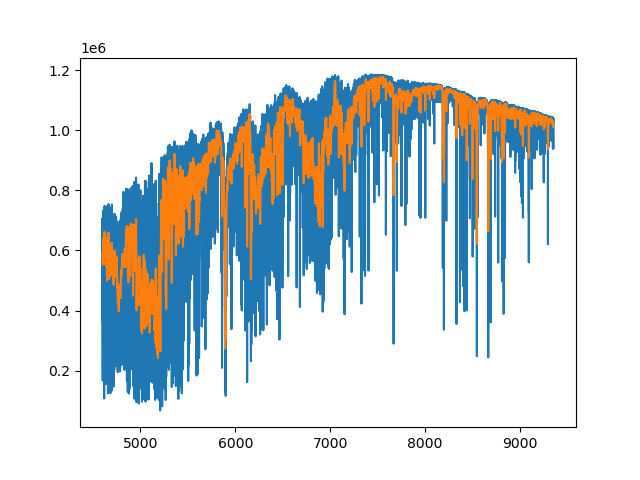

In [74]:
plt.figure()
plt.plot(nlam,finterp)
plt.plot(nlam,thingo)

'p3800_g+5.0_m0.0_t02_st_z+0.50_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00'